In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
over_50 = df[df["age"]>50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


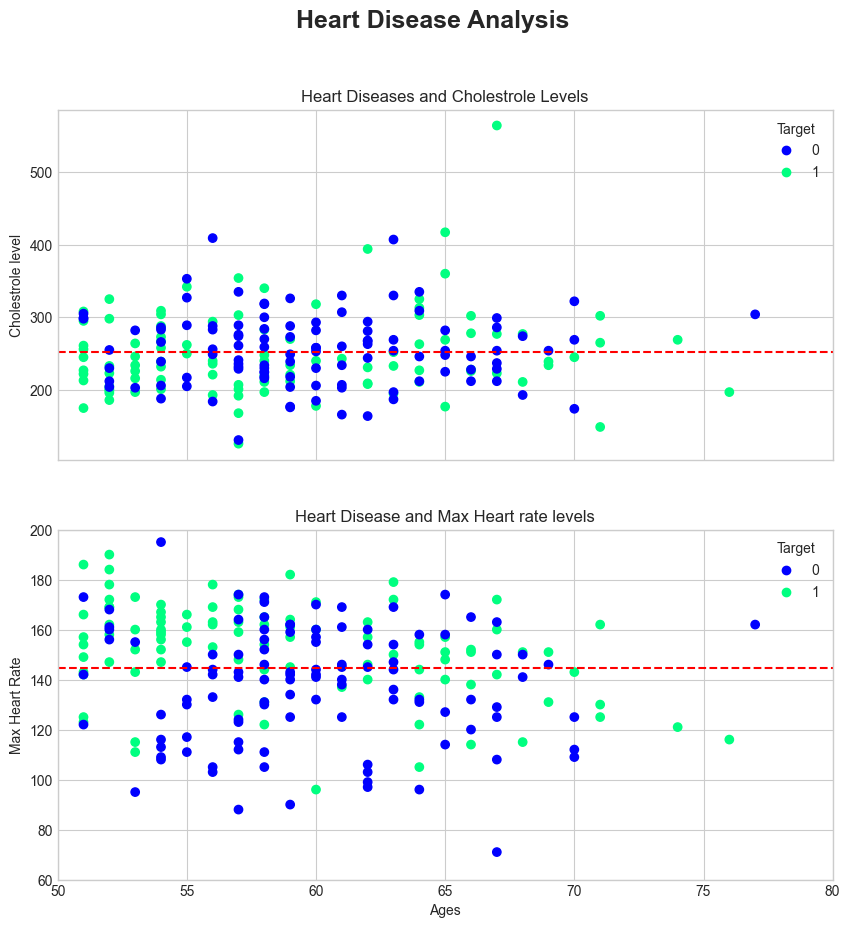

In [4]:
plt.style.use("seaborn-v0_8-whitegrid")
# Create a figure with 2 axis:
fig, (ax0,ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10),
                              sharex= True
                            )
fig.suptitle("Heart Disease Analysis", fontsize= 18, fontweight= 'bold');


# 1. Add data to ax0:
scatter = ax0.scatter(x= over_50["age"],
                      y= over_50["chol"],
                      c= over_50["target"],
                      cmap="winter")
ax0.set_xlim([50,80])
# Customize our plot:
ax0.set(title= "Heart Diseases and Cholestrole Levels",
        ylabel= "Cholestrole level")
ax0.legend(*scatter.legend_elements(),title="Target")

# Add a horizontal dash line:
ax0.axhline(y=over_50["chol"].mean(),
            linestyle="--",
            c="r");

# 2. Add Data to ax1:
scatter1 = ax1.scatter(x=over_50["age"],
                       y= over_50["thalach"],
                       c=over_50["target"],
                       cmap="winter")

ax1.set_ylim([60,200])

# Customize our plot:
ax1.set(title="Heart Disease and Max Heart rate levels",
        xlabel= "Ages",
        ylabel= "Max Heart Rate")   
ax1.legend(*scatter1.legend_elements(),title= "Target")

# Add the horizontal line:
ax1.axhline(y= over_50["thalach"].mean(),
            linestyle= "--",
            c="r");

In [5]:
np.random.seed(99)

X = df.drop("target", axis = 1)
Y = df['target']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

0.8524590163934426